In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle
import seaborn as sns
from scipy import stats

# TODO : Importation des librairies
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDRegressor, PassiveAggressiveRegressor, LinearRegression, Lasso, ElasticNet, Ridge, HuberRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, MiniBatchKMeans, MeanShift, OPTICS, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle

#metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder


import tensorflow as tf


# TODO : Importation des librairies
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split, GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.metrics import AUC


2023-08-11 08:21:55.121047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import imblearn
print(imblearn.__version__)

0.11.0


In [5]:
pip install plotly==5.14.1

Note: you may need to restart the kernel to use updated packages.


In [6]:
import plotly.express as px
import plotly.graph_objects as go

In [7]:
#df = pd.read_csv('../Datasets_sauvegardes/dataset-fraude-detection-fusionner-sans-nan-feature-ingeniering-15-06-2023.csv')
df = pd.read_csv('../Datasets_sauvegardes/dataset-fraude-detection-fusionner-sans-nan-feature-ingeniering-10-08-2023.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,isFraud,TransactionAmt,ProductCD,card1,card3,card4,card5,card6,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,D1,D2,D3,D4,D10,D11,D15,M4,M6,V3,V4,V5,V6,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V96,V97,V98,V99,V100,V101,V102,V103,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V131,V281,V282,V283,V284,V285,V287,V288,V289,V290,V291,V292,V293,V300,V301,V302,V303,V304,V309,V310,V312,V313,V314,V315,Year,Month,NbTran_by_client,SunMontTran_by_client,MoyTran_by_client,MaxMontTran_by_client,MinMontTran_by_client,DiffTran_by_client
0,0,68.5,4,13926,150,1,142,1,87,16,1,1,0,0,0,1,0,0,1,0,2,0,1,14,0,13,0,13,13,0,2,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,1,68.50,68.50,68.50,68.50,0.00
1,0,29.0,4,2755,150,2,102,1,87,16,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,131,56922.92,434.53,4592.02,25.95,4566.07
2,0,59.0,4,4663,150,3,166,2,87,35,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,315,315,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,198,19564.40,98.81,664.00,12.50,651.50
3,0,50.0,4,18132,150,2,117,2,87,53,2,5,0,0,0,4,0,0,1,0,1,0,25,112,112,0,94,84,0,111,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,48,28,0,10,4,1,38,24,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,135.0,0,0,0,0,10,4,0,0,1,1,1,1,0,0,0,0,0,0.0,354.0,135.0,0.0,0.0,0.0,1970,1,6,490.00,81.67,120.00,50.00,70.00
4,0,50.0,1,4497,150,2,102,1,87,16,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,3,130.00,43.33,50.00,30.00,20.00


In [8]:
#df.to_csv('dataset-fraude-detection-fusionner-sans-nan-feature-ingeniering-18-06-2023.csv', index=False)

In [9]:
# Prétraitement des données
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.values)

In [10]:
df_scaled

array([[0.00000000e+00, 2.13697908e-03, 1.00000000e+00, ...,
        2.13697908e-03, 2.13697908e-03, 0.00000000e+00],
       [0.00000000e+00, 9.00174530e-04, 1.00000000e+00, ...,
        1.43775210e-01, 8.04674432e-04, 7.14227392e-01],
       [0.00000000e+00, 1.83951976e-03, 1.00000000e+00, ...,
        2.07829818e-02, 3.83534656e-04, 1.01908018e-01],
       ...,
       [0.00000000e+00, 9.61231970e-04, 1.00000000e+00, ...,
        5.29821706e-02, 6.49682470e-04, 2.61433563e-01],
       [0.00000000e+00, 3.65558719e-03, 1.00000000e+00, ...,
        3.65558719e-03, 3.65558719e-03, 0.00000000e+00],
       [0.00000000e+00, 8.75779735e-03, 1.00000000e+00, ...,
        1.32979659e-02, 1.38550290e-03, 5.95102158e-02]])

In [11]:
# Séparation des données en features (X) et target (y)
X = df_scaled[:, 1:]  # Toutes les colonnes sauf la première
y = df_scaled[:, 0]  # Première colonne (target)



In [12]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((472432, 173), (118108, 173), (472432,), (118108,))

In [13]:
#over_sampling sur les donnees d'entrainement

from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_train, y_train = sm.fit_resample(X_train, y_train)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((911804, 173), (118108, 173), (911804,), (118108,))

In [14]:
# Reshape des données pour être compatible avec le modèle RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
# Création du modèle RNN
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec l'AUC comme métrique
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[AUC()])


2023-08-11 08:22:05.829522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21342 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:c3:00.0, compute capability: 8.6


In [16]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=512 , validation_data=(X_test, y_test))

Epoch 1/10


2023-08-11 08:22:09.318069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-11 08:22:09.416469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-11 08:22:09.448002: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f844402cdc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-11 08:22:09.448029: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-08-11 08:22:09.454608: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


   6/1781 [..............................] - ETA: 18s - loss: 0.6930 - auc: 0.5193    

2023-08-11 08:22:09.567268: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1781/1781 [==============================] - 24s 12ms/step - loss: 0.5973 - auc: 0.7421 - val_loss: 0.5058 - val_auc: 0.7822
Epoch 2/10
1781/1781 [==============================] - 21s 12ms/step - loss: 0.5451 - auc: 0.7980 - val_loss: 0.5959 - val_auc: 0.7987
Epoch 3/10
1781/1781 [==============================] - 21s 12ms/step - loss: 0.5304 - auc: 0.8103 - val_loss: 0.5226 - val_auc: 0.8080
Epoch 4/10
1781/1781 [==============================] - 21s 12ms/step - loss: 0.5096 - auc: 0.8271 - val_loss: 0.5209 - val_auc: 0.8165
Epoch 5/10
1781/1781 [==============================] - 22s 12ms/step - loss: 0.4910 - auc: 0.8413 - val_loss: 0.4280 - val_auc: 0.8223
Epoch 6/10
1781/1781 [==============================] - 21s 12ms/step - loss: 0.4768 - auc: 0.8515 - val_loss: 0.4946 - val_auc: 0.8272
Epoch 7/10
1781/1781 [==============================] - 21s 12ms/step - loss: 0.4649 - auc: 0.8596 - val_loss: 0.5015 - val_auc: 0.8305
Epoch 8/10
1781/1781 [==============================] - 21s

In [17]:
# Sauvegarder notre model
filename = '../Models_sauvegardes/model_RNN_10_08_2023_2.sav'
pickle.dump(model, open(filename, 'wb'))

In [18]:
# Évaluation du modèle sur les données de test
loss, auc = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("AUC:", auc)

3691/3691 [==============================] - 16s 4ms/step - loss: 0.3647 - auc: 0.8427
Loss: 0.3647327125072479
AUC: 0.8426833152770996


In [19]:
# Faire des prédictions avec le modèle
predictions = model.predict(X_test)

3691/3691 [==============================] - 13s 4ms/step


In [20]:
# Évaluation du modèle sur les données de test
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = model.evaluate(X_test, y_test)[1]
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"F1-score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

3691/3691 [==============================] - 16s 4ms/step - loss: 0.3647 - auc: 0.8427
Accuracy: 0.8426833152770996
AUC: 0.8427020805847594
F1-score: 0.23579557563616216
Precision: 0.14310844370860928
Recall: 0.6692475199612872


In [21]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[102194  11781]
 [  1654   2479]]


In [22]:
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tn, fp, fn, tp = matrix_threshold.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  2479
True Negative (TN):  102194
False Positive (FP):  11781
False Negative (FN):  1654


In [23]:
def plot_learning_curves(history):
    # Extraire les métriques d'apprentissage du modèle
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['auc']
    val_accuracy = history.history['val_auc']

    # Tracer les courbes de perte
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Tracer les courbes d'exactitude
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training AUC')
    plt.plot(val_accuracy, label='Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.title('Training and Validation AUC')
    plt.legend()

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

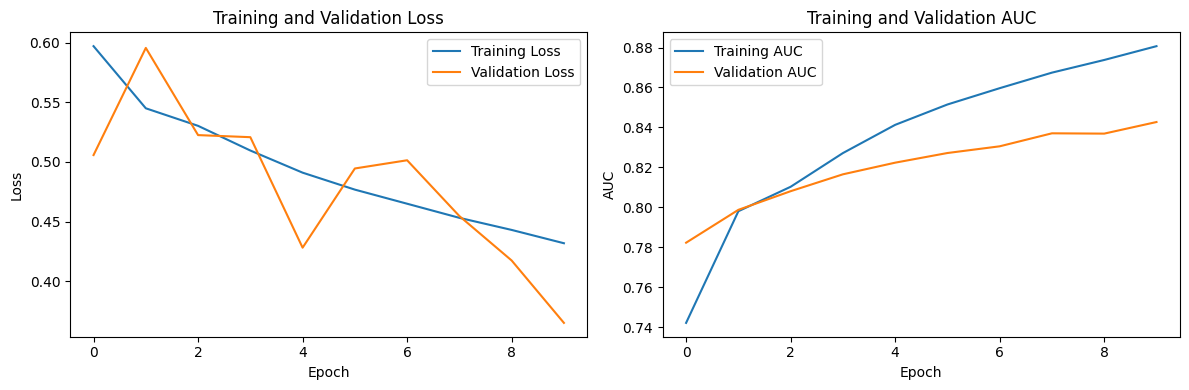

In [24]:
# Tracer les courbes d'apprentissage et de validation
plot_learning_curves(history)

In [25]:
# Évaluation du modèle sur les données de test
loss, auc = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("AUC:", auc)

# Faire des prédictions avec le modèle
predictions = model.predict(X_test)

3691/3691 [==============================] - 16s 4ms/step - loss: 0.3647 - auc: 0.8427
Loss: 0.3647327125072479
AUC: 0.8426833152770996
3691/3691 [==============================] - 13s 4ms/step


In [26]:
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [27]:
# Convert the NumPy array to a Pandas Series
y_pred_binary_pd = pd.DataFrame(y_pred_binary)
y_pred_binary_pd

,0
0,0
1,0
2,0
3,0
4,0
...,...
118103,0
118104,1
118105,0
118106,0


In [28]:
# Renommer les colonnes
y_pred_binary_pd.columns =['Prediction']
y_pred_binary_pd.head(2)

,Prediction
0,0
1,0


In [29]:
# Renommer les colonnes
y_test_true = y_test
y_test_true.columns =['Valeur reelle']
y_test_true.head(2)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Copier les index dans une nouvelle colonne
index_col = y_test.reset_index().rename(columns={'index': 'index_col'})['index_col']
index_col

In [ ]:
#Modifier l'index des y_pred_binary_pd
y_pred_binary_pd = y_pred_binary_pd.set_index(pd.Index(index_col))
y_pred_binary_pd

In [ ]:
#Fusionner les y_test et y_pred_binary_pd
merged_df_pred = pd.merge(y_test, y_pred_binary_pd ,how ='left',left_index=True,right_index=True)
merged_df_pred.head(10)